# Predict gene knockout strategies

In cameo we have two ways of predicting gene knockout targets: using evolutionary algorithms (OptGene) or linear programming (OptKnock)

In [1]:
from cameo import models

In [2]:
model = models.bigg.e_coli_core.copy()
model.solver = "cplex"

In [3]:
from cameo import phenotypic_phase_plane

In [4]:
ppp = phenotypic_phase_plane(model, variables=[model.reactions.BIOMASS_Ecoli_core_w_GAM], objective=model.reactions.EX_ac_e)
ppp.plot()

## OptGene

OptGene is an approach to search for gene or reaction knockouts that relies on evolutionary algorithms[1]. The following image from authors summarizes the OptGene workflow.

<img src="http://static-content.springer.com/image/art%3A10.1186%2F1471-2105-6-308/MediaObjects/12859_2005_Article_632_Fig1_HTML.jpg"/>

Every iteration we keep the best 50 individuals so we can generate a library of targets.

In [5]:
from cameo.strain_design.heuristic.evolutionary_based import OptGene

In [6]:
optgene = OptGene(model)

In [7]:
result = optgene.run(target="EX_ac_e", 
                     biomass=model.reactions.BIOMASS_Ecoli_core_w_GAM,
                     substrate=model.metabolites.glc__D_e,
                     max_evaluations=5000,
                     plot=False)

Starting optimization at Fri, 10 Jun 2016 06:38:55


/opt/conda/envs/python3.4/lib/python3.4/site-packages/ipywidgets/widgets/widget_string.py:55: UserWarning:

The Latex widget is deprecated. Use Label instead



Finished after 00:00:11


In [8]:
result

/opt/conda/envs/python3.4/lib/python3.4/site-packages/ipywidgets/widgets/widget_string.py:55: UserWarning:

The Latex widget is deprecated. Use Label instead



In [9]:
result.plot(0)

In [10]:
result.display_on_map(0, "e_coli_core.Core metabolism")

## OptKnock

OptKnock uses a bi-level mixed integer linear programming approach to identify reaction knockouts[2]:

$$
\begin{matrix}
maximize & \mathit{v_{chemical}} & & (\mathbf{OptKnock}) \\
\mathit{y_j} & & & \\
subject~to & maximize & \mathit{v_{biomass}} & (\mathbf{Primal}) \\
& \mathit{v_j} & & & & \\
\end{matrix}\\
\begin{bmatrix}
subject~to  & \sum_{j=1}^{M}S_{ij}v_{j} = 0,\\ 
& v_{carbon\_uptake} = v_{carbon~target}\\ 
& v_{apt} \ge v_{apt\_main}\\ 
& v_{biomass} \ge v_{target\_biomass}\\ 
& v_{j}^{min} \cdot y_j \le v_j \le v_{j}^{max} \cdot y_j, \forall j \in \boldsymbol{M} \\
\end{bmatrix}\\
\begin{align}
 & y_j = {0, 1}, & & \forall j \in \boldsymbol{M} & \\
 & \sum_{j \in M} (1 - y_j) \le K& & & \\
\end{align}
$$



In [11]:
from cameo.strain_design.deterministic.linear_programming import OptKnock

In [12]:
optknock = OptKnock(model, fraction_of_optimum=0.1)

Running multiple knockouts with OptKnock can take a few hours or days...


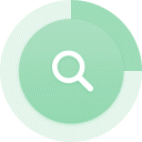

<IPython.core.display.Javascript object>

In [13]:
result = optknock.run(max_knockouts=1, target="EX_ac_e", biomass="BIOMASS_Ecoli_core_w_GAM")

In [14]:
result

/opt/conda/envs/python3.4/lib/python3.4/site-packages/ipywidgets/widgets/widget_string.py:55: UserWarning:

The Latex widget is deprecated. Use Label instead



In [15]:
result.plot(0)

In [16]:
result.display_on_map(0, "e_coli_core.Core metabolism")

## References

[1]Patil, K. R., Rocha, I., Förster, J., & Nielsen, J. (2005). Evolutionary programming as a platform for in silico metabolic engineering. BMC Bioinformatics, 6, 308. doi:10.1186/1471-2105-6-308

[2]Burgard, A.P., Pharkya, P., Maranas, C.D. (2003), "OptKnock: A Bilevel Programming Framework for Identifying Gene Knockout Strategies for Microbial Strain Optimization," Biotechnology and Bioengineering, 84(6), 647-657.

## Exercises

* Use OptGene or OptKnock to find a growth coupled design for a product of your choice!